In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
#they're a little garish but the datacamp cheat sheets are a good quick reference
#for plotting functions and related arguments for manipulating them 

#matplotlib - https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf
#seaborn - https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

In [35]:
#load example data

age = "https://raw.githubusercontent.com/xroopnar/SPUG2019/master/SPUG_agemodel.csv"
data = "https://raw.githubusercontent.com/xroopnar/SPUG2019/master/SPUG_tiny_data.csv"
labels = "https://raw.githubusercontent.com/xroopnar/SPUG2019/master/SPUG_labels.csv"
fscores = "https://raw.githubusercontent.com/xroopnar/SPUG2019/master/SPUG_fscores.csv"

age = pd.read_csv(age,index_col=0)
data = pd.read_csv(data,index_col=0)
labels = pd.read_csv(labels,index_col=0)
#labels.TissueName = list(labels.TissueName)
fscores = pd.read_csv(fscores,index_col=0)
fscores.columns = ["KNN","LOGR","RF","KNN","LOGR","RF"]
print(age.shape,data.shape,labels.shape,fscores.shape)

sns.set_style("whitegrid")

(282, 3) (1242, 1000) (9154, 9) (7, 6)


# Visualize labels 
## Barplot counts of tissue annotations after slicing to relevant samples

In [4]:
labels.head()

,TaxonID,PlatformID,ExperimentID,Molecule,Age,Gender,TissueID,DiseaseState,TissueName
GSM1617040,9606,13534,66210,genomic DNA,NaN,NaN,89,0,blood
GSM1831335,9606,13534,71245,genomic DNA,49.0,F,89,0,blood
GSM990274,9606,13534,40279,genomic DNA,NaN,M,89,0,blood
GSM1509964,9606,13534,61653,genomic DNA,NaN,NaN,89,0,blood
GSM1225699,9606,13534,50660,genomic DNA,56.0,F,89,0,blood


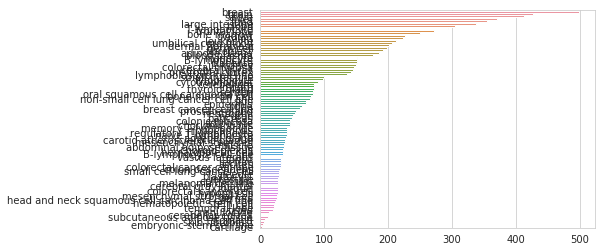

In [36]:
#looks pretty gross, maybe we should check if these annotations are right
label_counts = labels.TissueName.value_counts()
sns.barplot(y=label_counts.index,x=label_counts.values)
plt.show()

In [6]:
#align data to annotations to find relevant annotations or missing information
data,labels = data.align(labels,join="inner",axis=0)

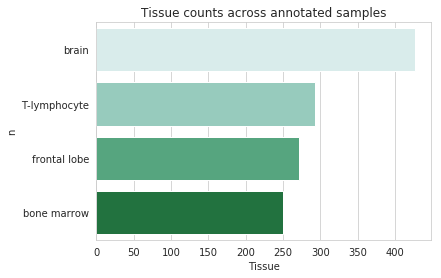

In [7]:
#label_counts = labels.TissueName.value_counts().sort_values(ascending=False)[0:20]
label_counts = labels.TissueName.value_counts()
sns.barplot(y=label_counts.index,x=label_counts.values,log=False,palette="BuGn")
plt.title("Tissue counts across annotated samples")
plt.xlabel("Tissue")
plt.ylabel("n")
plt.show()

# Visualize data
## Managing large dataset for use in seaborn plotting tools where spot-checking is infeasible

In [8]:
data.shape

(1242, 1000)

In [9]:
data.head()

,9611,100132707,574494,54622,440465,64151,441282,5524,23344,57178,...,102682016,390038,4784,9577,54453,9439,554223,441272,103344929,8823
GSM1404124,0.593278,0.159713,0.552773,0.887201,0.752376,0.064782,0.577760,0.459988,0.075172,0.098989,...,0.261808,0.581119,0.363503,0.791346,0.112213,0.791812,0.884257,0.773579,0.688271,0.805395
GSM1438264,0.671212,0.503595,0.668371,0.671141,0.350839,0.106301,0.478525,0.172701,0.122911,0.106552,...,0.597478,0.753756,0.572624,0.740464,0.195841,0.793637,0.732863,0.850680,0.813435,0.729730
GSM1269760,0.754687,0.481456,0.642046,0.529795,0.749447,0.082483,0.613443,0.332416,0.091326,0.167530,...,0.095672,0.777432,0.556090,0.809779,0.250353,0.775489,0.802736,0.870004,0.671667,0.657290
GSM886067,0.824935,0.442685,0.677556,0.538332,0.781661,0.055583,0.631201,0.278238,0.082505,0.092253,...,0.543296,0.582827,0.448941,0.811930,0.255680,0.743877,0.767874,0.826049,0.235668,0.811777
GSM1404009,0.638180,0.226426,0.547676,0.818637,0.704749,0.062868,0.541751,0.322037,0.085700,0.102336,...,0.627477,0.544007,0.397251,0.826884,0.119193,0.710059,0.850233,0.773076,0.761416,0.382550


In [10]:
data.describe()

,9611,100132707,574494,54622,440465,64151,441282,5524,23344,57178,...,102682016,390038,4784,9577,54453,9439,554223,441272,103344929,8823
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,...,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,0.608590,0.240385,0.680892,0.721191,0.674318,0.089301,0.581620,0.333902,0.100214,0.117833,...,0.264460,0.743246,0.494270,0.737123,0.489500,0.764460,0.756698,0.844818,0.678055,0.738397
std,0.134009,0.124853,0.054389,0.095362,0.163022,0.032990,0.078938,0.058390,0.044288,0.038772,...,0.131561,0.076859,0.068837,0.113103,0.247392,0.048113,0.077550,0.043029,0.132830,0.075390
min,0.084410,0.065021,0.393873,0.225961,0.208939,0.053472,0.321141,0.160898,0.064712,0.082448,...,0.081832,0.166450,0.178565,0.110086,0.077327,0.455115,0.229426,0.337807,0.104897,0.228557
25%,0.520595,0.126291,0.667443,0.675602,0.555903,0.076886,0.528609,0.303694,0.088175,0.103078,...,0.188123,0.735682,0.458906,0.694210,0.248101,0.746899,0.717114,0.834320,0.615318,0.691167
50%,0.630806,0.227663,0.691899,0.728351,0.737775,0.084334,0.593590,0.332842,0.094940,0.110718,...,0.223444,0.759147,0.493903,0.749233,0.423985,0.774671,0.766954,0.851157,0.707138,0.732682
75%,0.712082,0.317215,0.712364,0.778571,0.808892,0.093090,0.638554,0.366313,0.102983,0.121806,...,0.290508,0.782482,0.537325,0.810149,0.747741,0.794923,0.811223,0.864682,0.772148,0.797905
max,0.923956,0.601850,0.841404,0.967137,0.874879,0.489502,0.823015,0.690375,0.578659,0.510651,...,0.878965,0.857371,0.752712,0.969066,0.870700,0.854608,0.942511,0.901056,0.894446,0.873903


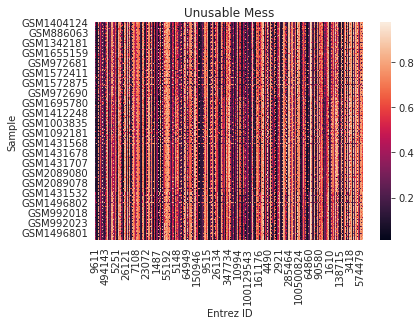

In [11]:
#too much data to "just look at it"
sns.heatmap(data=data)
plt.title("Unusable Mess")
plt.xlabel("Entrez ID")
plt.ylabel("Sample")
plt.show()

/home/xiavan/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


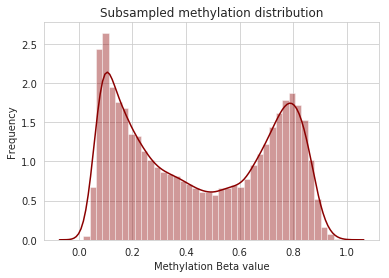

In [12]:
data_dist = data.sample(100).T.sample(1000).T.unstack()
sns.distplot(data_dist,color="DarkRed")
plt.title("Subsampled methylation distribution")
#setting axes
#plt.xlim(0,.5)
#plt.ylim(0,2)
plt.xlabel("Methylation Beta value")
plt.ylabel("Frequency")
plt.show()

In [13]:
data_means = data.mean(axis=0)
print(data_means.shape)

(1000,)


/home/xiavan/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


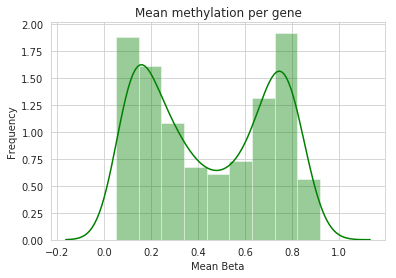

In [14]:
#sns.distplot(data_means,color="green",kde=False,hist=False)
sns.distplot(data_means,color="green")
plt.title("Mean methylation per gene")
plt.ylabel("Frequency")
plt.xlabel("Mean Beta")
plt.show()

/home/xiavan/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


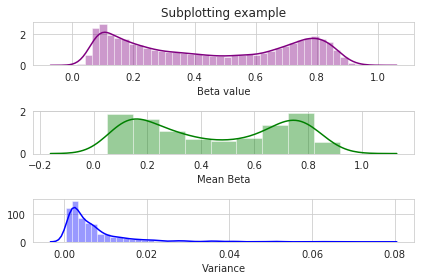

In [15]:
data_var = data.var(axis=0)
f, axes = plt.subplots(3, 1, sharex=False)

a = sns.distplot(data_dist,color="purple", ax=axes[0])
b = sns.distplot(data_means,color="green", ax=axes[1])
c = sns.distplot(data_var,color="blue", ax=axes[2])
#plt.xlabel("Beta value")
axes[0].set_xlabel("Beta value")
axes[1].set_xlabel("Mean Beta")
axes[2].set_xlabel("Variance")
axes[0].set_title("Subplotting example")
plt.tight_layout()

## Violin plots are good for quickly comparing distributions 
### Strip plots are also good for this 

/home/xiavan/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


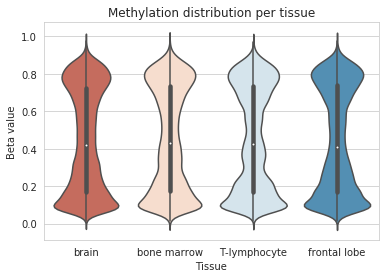

In [16]:
#seaborn can take lists of arrays
tissue_dist = []
tissue_labels = labels.TissueName.unique()
for tissue in tissue_labels:
    current_tissue = labels[labels.TissueName==tissue].index
    current_tissue = data.loc[current_tissue]
    tissue_dist.append(current_tissue)
vplot = sns.violinplot(data=tissue_dist,palette="RdBu")
vplot.set_xticklabels(tissue_labels)
plt.title("Methylation distribution per tissue")
plt.ylabel("Beta value")
plt.xlabel("Tissue")
plt.show()

In [17]:
### Example box plot 

Text(0.5,1,'Test boxplot')

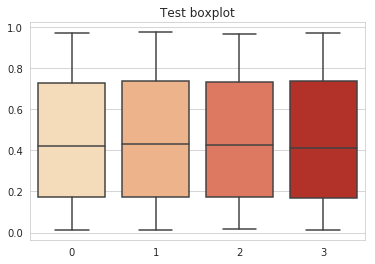

In [20]:

sns.boxplot(data=tissue_dist,palette="OrRd")
plt.title("Test boxplot")

## PCA
### Plot first and second components to assess any biologically relevant separation

In [21]:
pca = PCA(n_components=100)
pc = pca.fit_transform(data)
#remember to preserve index!
pc = pd.DataFrame(pc,index=data.index)
pc.columns = [ "PC"+str(x+1) for x in pc.columns]
pc["Tissue"] = labels.loc[data.index].TissueName
pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,Tissue
GSM1404124,-1.510602,0.730523,-1.567068,-0.092432,-0.364702,0.895185,-1.394593,0.216295,0.065080,-0.078052,...,-0.063386,-0.127016,-0.124465,-0.056708,-0.111928,-0.039648,0.114218,-0.049935,-0.047636,brain
GSM1438264,-1.607297,0.061118,0.554576,0.117442,0.141842,0.247409,0.768103,1.772168,0.889381,0.115321,...,0.005620,0.032950,0.012067,-0.009886,0.018277,-0.013667,-0.048096,-0.024834,-0.002441,brain
GSM1269760,-1.031312,0.258989,-0.156298,-0.543271,0.375979,-0.562699,-0.164434,-0.023162,-0.412986,0.632205,...,0.076527,-0.090590,-0.048216,0.027696,0.072063,0.034819,0.002018,-0.061628,-0.096319,brain
GSM886067,-1.019721,1.092872,-1.943406,-0.615656,0.133784,0.485715,-0.307163,-0.097142,0.282798,0.308268,...,-0.038107,-0.053511,-0.115117,0.062935,-0.118722,-0.104103,-0.002736,0.034568,0.032400,brain
GSM1404009,-1.444976,0.923348,-1.614801,-0.450103,0.330486,0.698191,-1.400034,0.209599,0.390380,0.276386,...,-0.141338,0.050399,0.009287,0.055664,0.034698,0.020448,-0.078512,-0.174313,-0.048402,brain


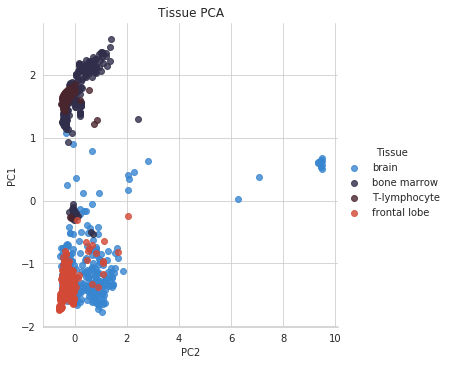

In [22]:
sns.lmplot(y="PC1",x="PC2",data=pc,hue="Tissue",fit_reg=False,palette="icefire")
plt.title("Tissue PCA")
plt.show()

In [23]:
import plotly.express as px
fig = px.scatter(pc,x="PC2",y="PC1",render_mode="svg",color="Tissue",title="Test Plotly PCA")
fig.show()

ModuleNotFoundError: No module named 'plotly'

## Annotated heatmaps
### Plot tabular data into heatmap

In [24]:
fscores.shape

(7, 6)

In [25]:
fscores

,KNN,LOGR,RF,KNN.1,LOGR.1,RF.1
Probe,0.93,0.9700,0.9200,0.96,0.96,0.95
Probe Control,0.94,0.9700,0.9300,0.94,0.96,0.95
Promoter,0.79,0.8700,0.7700,0.94,0.95,0.93
Genebody,0.77,0.8800,0.7300,0.94,0.95,0.92
CGI,0.75,0.8700,0.7300,0.94,0.95,0.93
Expression,0.64,0.4200,0.6800,0.78,0.69,0.91
Permuted Prom.,0.01,0.0076,0.0094,0.50,0.49,0.50


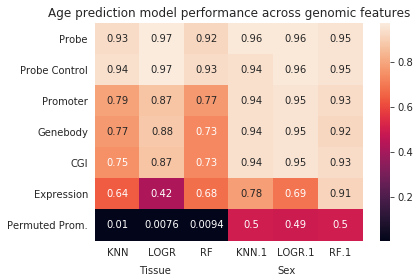

In [26]:
#sns.heatmap(fscores,annot=True,cmap="Blues")
sns.heatmap(fscores,annot=True)
plt.title("Age prediction model performance across genomic features")
plt.annotate("Tissue",[0.33,0.02],xycoords="figure fraction")
plt.annotate("Sex",[0.66,0.02],xycoords="figure fraction")
plt.show()

In [27]:
## scatterplot with dist, r2 of predictions

In [28]:
#matplotlib example

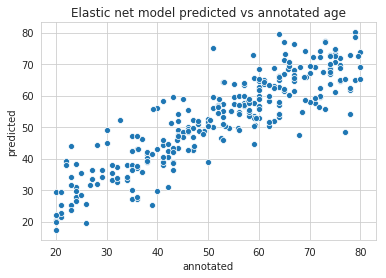

In [29]:
#scatterplot 
sns.scatterplot(x="annotated",y="predicted",data=age)
plt.title("Elastic net model predicted vs annotated age")
plt.show()

/home/xiavan/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


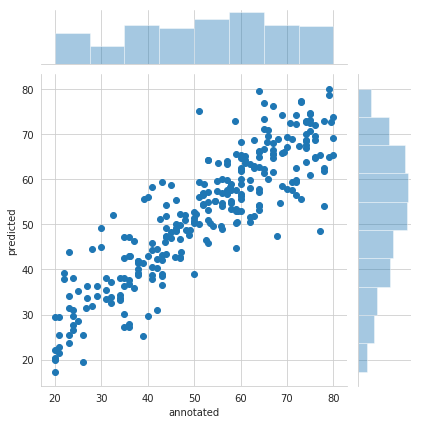

In [30]:
sns.jointplot(x="annotated",y="predicted",data=age)
plt.show()

/home/xiavan/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/xiavan/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1,'Elastic net model predicted vs annotated age')

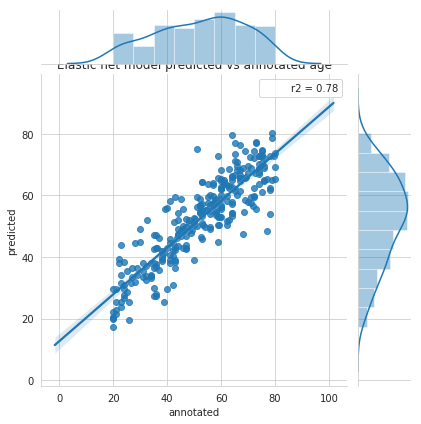

In [31]:
def r2(x,y):
    return(stats.pearsonr(x,y)[0]**2)
sns.jointplot(x="annotated",y="predicted",kind="reg",stat_func=r2,data=age)
plt.title("Elastic net model predicted vs annotated age")
#plt.title("Hello from up here", y=1.2, fontsize = 16)